Clothing_Categorization

Parker Williamson
1/22/2018

This program takes a set of training data and classification data and using different methods of computer vision categorizes the test set based on the training set. The data that was used to analyze different techniques was clothing data from https://www.kaggle.com/zalando-research/fashionmnist.

(used https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=1493&v=mynJtLhhcXk as a template for CNN)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import tensorflow as tf
import os
import sys
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [14]:
%matplotlib inline

Dictionary definitions shows the true categories that the dataset lists

In [15]:
definitions = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

open data from the adjacent rawData folder

In [20]:
#reset directory using next line
#os.chdir('C:/Users/Parker/Documents/2018/SpringBoard/clothingCategorization/DataWrangling')

abspath = os.path.abspath(os.curdir)
print(abspath)
os.chdir("..")
path = os.path.abspath(os.curdir)
print(path)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataWrangling
C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization


In [21]:
train_data = genfromtxt('rawData/fashion-mnist_train.csv', skip_header=True, delimiter=',')

In [22]:
test_data = genfromtxt('rawData/fashion-mnist_test.csv', skip_header=True, delimiter=',')

In [23]:
os.chdir(abspath)
print(abspath)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataWrangling


In [24]:
#plt.imshow(train_data[6][1:785].reshape((28,28)))
#plt.show()

In [25]:
classification,rawData =np.split(train_data,indices_or_sections=[1],axis=1)

In [26]:
#plt.hist(rawData[0][:],range=(0,255),bins=25)
#plt.show()

0
Image 3: T-shirt/top


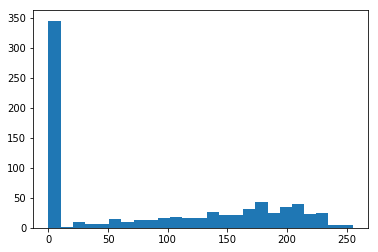

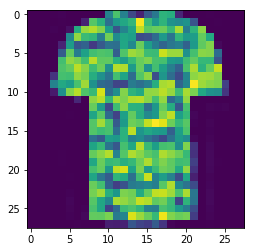

1
Image 29: Trouser


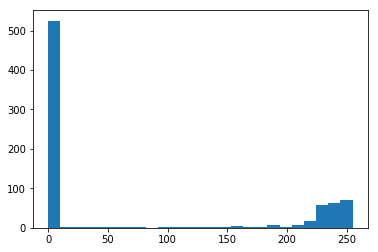

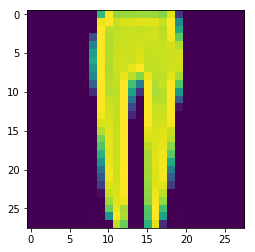

6
Image 2: Shirt


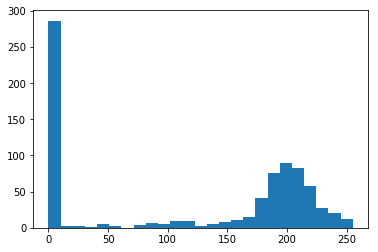

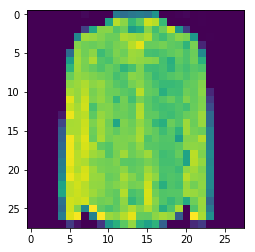

0
Image 3: T-shirt/top


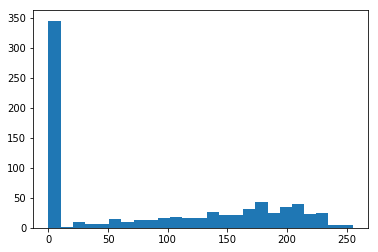

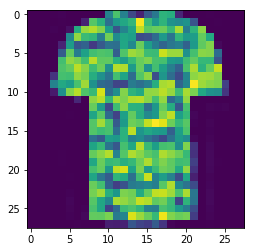

4
Image 5: Coat


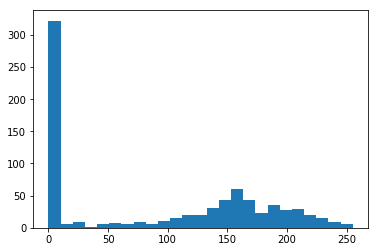

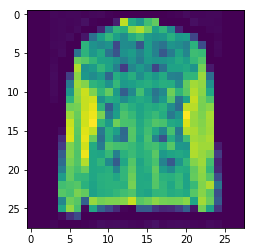

5
Image 7: Sandal


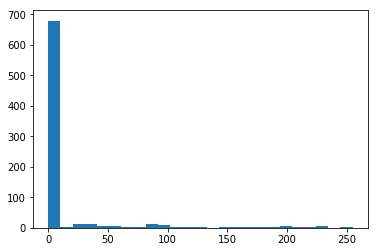

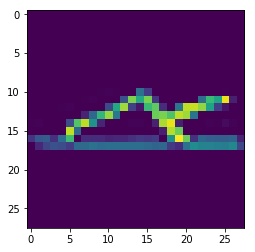

6
Image 2: Shirt


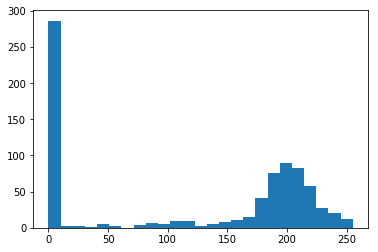

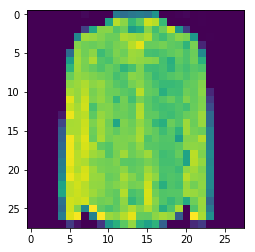

7
Image 21: Sneaker


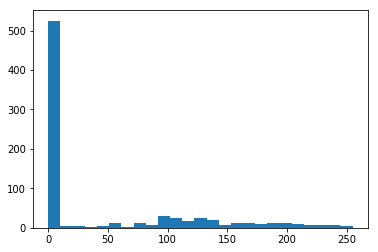

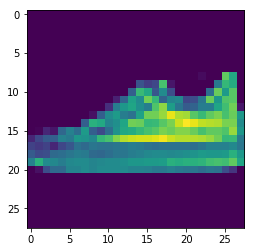

8
Image 9: Bag


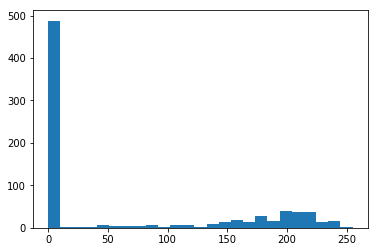

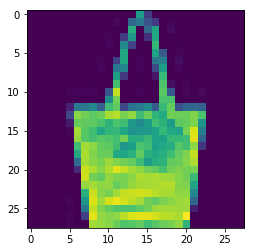

9
Image 1: Ankle boot


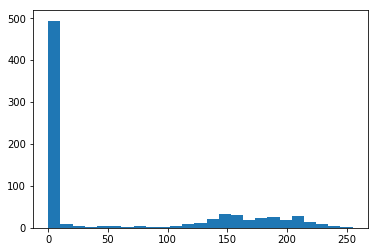

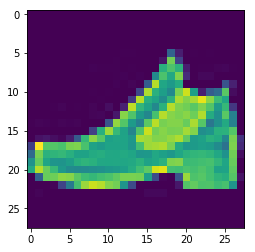

In [29]:
#show image data as an example
for image in [3,29,2,3,5,7,2,21,9,1]:#range(int(len(rawData))):
    print(int(classification.ravel()[image]))
    print('Image {}: {}'.format(image,definitions[int(classification.ravel()[image])]))
    #print('Image {}: mean {}'.format(image,rawData[image][:].mean()))
    plt.hist(rawData[image][:],range=(0,255),bins=25)
    plt.show()
    plt.imshow(rawData[image][0:785].reshape((28,28)))
    plt.show()

In [30]:
#compare mean median mode by image
images_mean = np.mean(rawData, axis=1, keepdims=1, dtype=int)
unique, images_counts = np.unique(classification.astype(int).ravel(), return_counts=True)
totals_mean = np.bincount(classification.astype(int).ravel(), images_mean.ravel())
#print(totals_mean)
#print(images_counts)
mean_by_type = totals_mean/images_counts
print('mean by type: {}'.format(mean_by_type))

#print(classification.ravel())
#print(np.median(rawData, axis=1, keepdims=1).ravel())
compressed = np.column_stack((classification.ravel(), np.median(rawData, axis=1, keepdims=1).ravel()))
#print(compressed)
images_median = pd.DataFrame(compressed,columns=['class','median of medians'])
sorted = images_median.groupby(['class'])
print(sorted.median())
images_mean_median = pd.DataFrame(compressed,columns=['class','mean of medians'])
sorted_mean_med = images_mean_median.groupby(['class'])
#print(sorted_mean_med.mean())
                       

mean by type: [ 82.37583333  56.24816667  95.22066667  65.70016667  97.65566667
  34.37516667  84.61316667  42.33666667  89.54033333  76.51516667]
       median of medians
class                   
0.0                 74.5
1.0                  0.0
2.0                118.5
3.0                  0.0
4.0                120.5
5.0                  0.0
6.0                 89.5
7.0                  0.0
8.0                 64.5
9.0                  0.0


Select preprocessing mode

In [175]:
mode='Standardize'

In [177]:
if mode=='Normalize':
    preclassifier_data = rawData.astype('float32')/255 #preprocessing.normalize(rawData)
elif mode=='Standardize':
    preclassifier_data = (rawData - np.mean(rawData, axis=1, keepdims=1)) / np.std(rawData, axis=1, keepdims=1)
else:
    preclassifier_data = rawData

In [178]:
#find biggest difference between normalized and normal image (absolute change in one dirrection)
max_delta = 0
max_delta_ind = 0
for image in range(int(len(rawData))):
    delta = abs(sum(np.array(rawData[image][0:784])-np.array(tempNorm[image][0:784])))
    if delta>max_delta:
        max_delta_ind = image
        max_delta = delta
        
    #print(abs(sum(rawData[image][0:785]-preclassifier_data[image][0:785])))
    
print('index {}:change {}'.format(max_delta_ind,max_delta))
print('sum: ',np.sum(np.sum(rawData[image][0:784])))

index 18712:change 150260.0122052641
sum:  58157.0


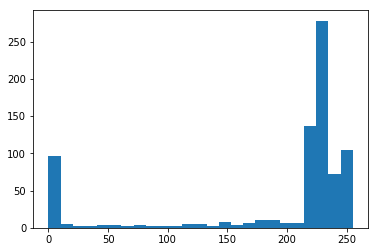

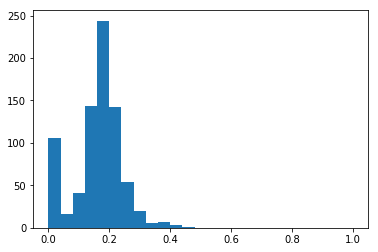

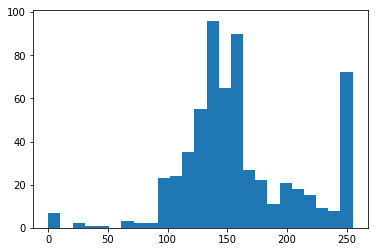

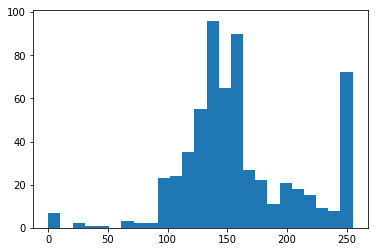

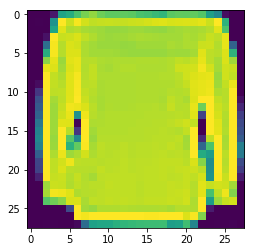

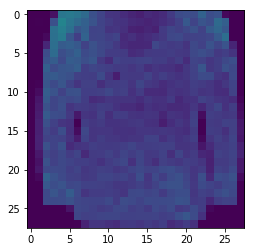

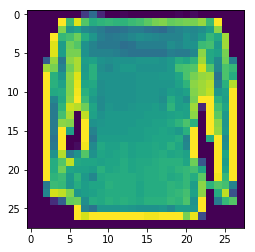

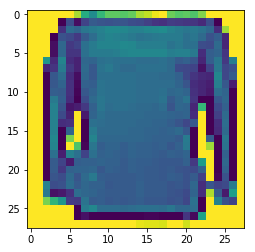

In [179]:
plt.hist(rawData[max_delta_ind][:],range=(0,255),bins=25)
plt.show()
plt.hist(tempNorm[max_delta_ind][:],range=(0,1),bins=25)
plt.show()
plt.hist(preclassifier_data[max_delta_ind][:],range=(0,255),bins=25)
plt.show()
plt.hist(preclassifier_data[max_delta_ind][:],range=(0,255),bins=25)
plt.show()

plt.imshow(rawData[max_delta_ind][0:785].reshape((28,28)),vmin=0, vmax=255)
plt.show()
plt.imshow(tempNorm[max_delta_ind][0:785].reshape((28,28)),vmin=0, vmax=1)
plt.show()
plt.imshow(preclassifier_data[max_delta_ind][0:785].reshape((28,28)),vmin=0, vmax=255)
plt.show()
subt_array = np.subtract(rawData[max_delta_ind][0:785].reshape((28,28)),preclassifier_data[max_delta_ind][0:785].reshape((28,28)))
plt.imshow(subt_array,vmin=0, vmax=255)
plt.show()

Select classifer that is desired

In [180]:
classifier= 'MLP'

In [39]:
print('classifier: {}'.format(classifier))
if classifier=='MLP':
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(784, 100, 100), random_state=1)
    clf.fit(preclassifier_data, classification.ravel())
#SVC should be run with mode=='Normalize'
elif classifier=='SVC':
    clf = svm.LinearSVC()
    clf.fit(preclassifier_data, classification.ravel())
elif classifier=='LinReg':
    clf = LogisticRegression()
    clf.fit(preclassifier_data, classification.ravel())

classifier: LinReg


In [181]:
classification_test,rawData_test =np.split(test_data,indices_or_sections=[1],axis=1)

In [183]:
if mode=='Normalize':
    preclassifier_data_test = rawData_test.astype('float32')/255 #preprocessing.normalize(rawData_test)
elif mode=='Standardize':
    preclassifier_data_test = (rawData_test - np.mean(rawData_test, axis=1, keepdims=1)) / np.std(rawData_test, axis=1, keepdims=1)
else:
    preclassifier_data_test = rawData_test

In [42]:
results = clf.predict(preclassifier_data_test)

In [43]:
print(results)
print(len(results))
print(len(classification_test))

[ 0.  1.  2. ...,  8.  6.  2.]
10000
10000


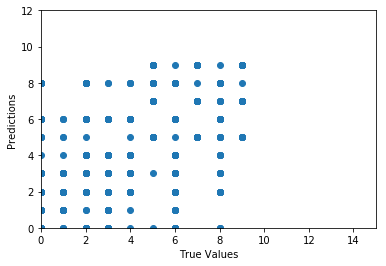

In [44]:
## The line / model
#%pylab inline
plt.scatter(classification_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis([0, 15, 0, 12])
plt.show()

In [45]:
comp= np.equal(list(classification_test.ravel()), list(results))
#print(comp.shape)
#print(classification_test.ravel())
#print(results)
print(comp)
print(comp.sum())
print('Percentage: {}'.format(100*(comp.sum()/(len(comp)))))

[ True  True  True ...,  True False False]
8445
Percentage: 84.45


Convolutional Neural Network below

In [ ]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train y_train), (x_test, y_test) = mnist.load_data()
x_train = preclassifier_data
y_train = classification.ravel()
x_test = preclassifier_data_test
y_test = classification_test.ravel()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.7502 - acc: 0.7318 - val_loss: 0.4668 - val_acc: 0.8268
Epoch 2/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.5102 - acc: 0.8180 - val_loss: 0.4004 - val_acc: 0.8562
Epoch 3/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.4542 - acc: 0.8394 - val_loss: 0.3687 - val_acc: 0.8644
Epoch 4/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.4185 - acc: 0.8488 - val_loss: 0.3397 - val_acc: 0.8755
Epoch 5/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.3992 - acc: 0.8581 - val_loss: 0.3288 - val_acc: 0.8785
Epoch 6/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3808 - acc: 0.8651 - val_loss: 0.3108 - val_acc: 0.8873
Epoch 7/12
60000/60000 [=========================

from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_3rd_layer_output([1])[0]